In [142]:
import numpy as np
import pandas as pd

df=pd.read_csv(r'diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [143]:
df=df.drop(['Unnamed: 0'],axis=1)
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [144]:
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())


['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [145]:
diz_cut={'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}
diz_color={'D':0,'E':1,'F':2,'G':3,'H':4,'I':5,'J':6}
diz_clarity={'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':4,'VVS1':4,'IF':4}

In [146]:
df['cut']=df['cut'].map(diz_cut)
df['color']=df['color'].map(diz_color)
df['clarity']=df['clarity'].map(diz_clarity)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,1,61.0,58.0,2757,6.15,6.12,3.74


In [147]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


<Axes: >

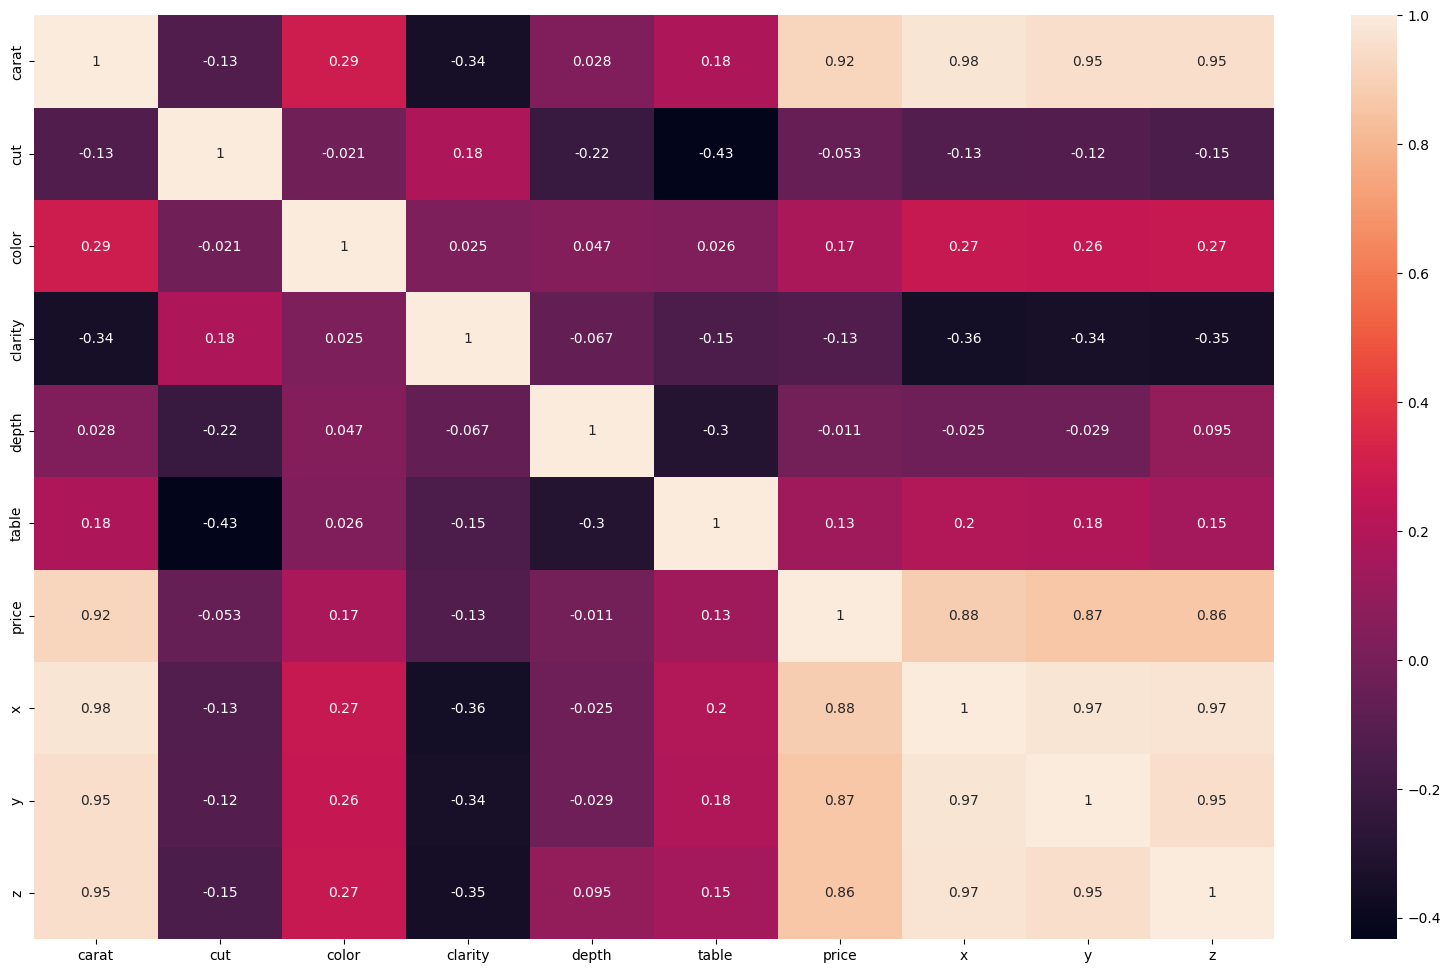

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 12))

sns.heatmap(df.corr(), ax=ax, annot=True)

<Axes: >

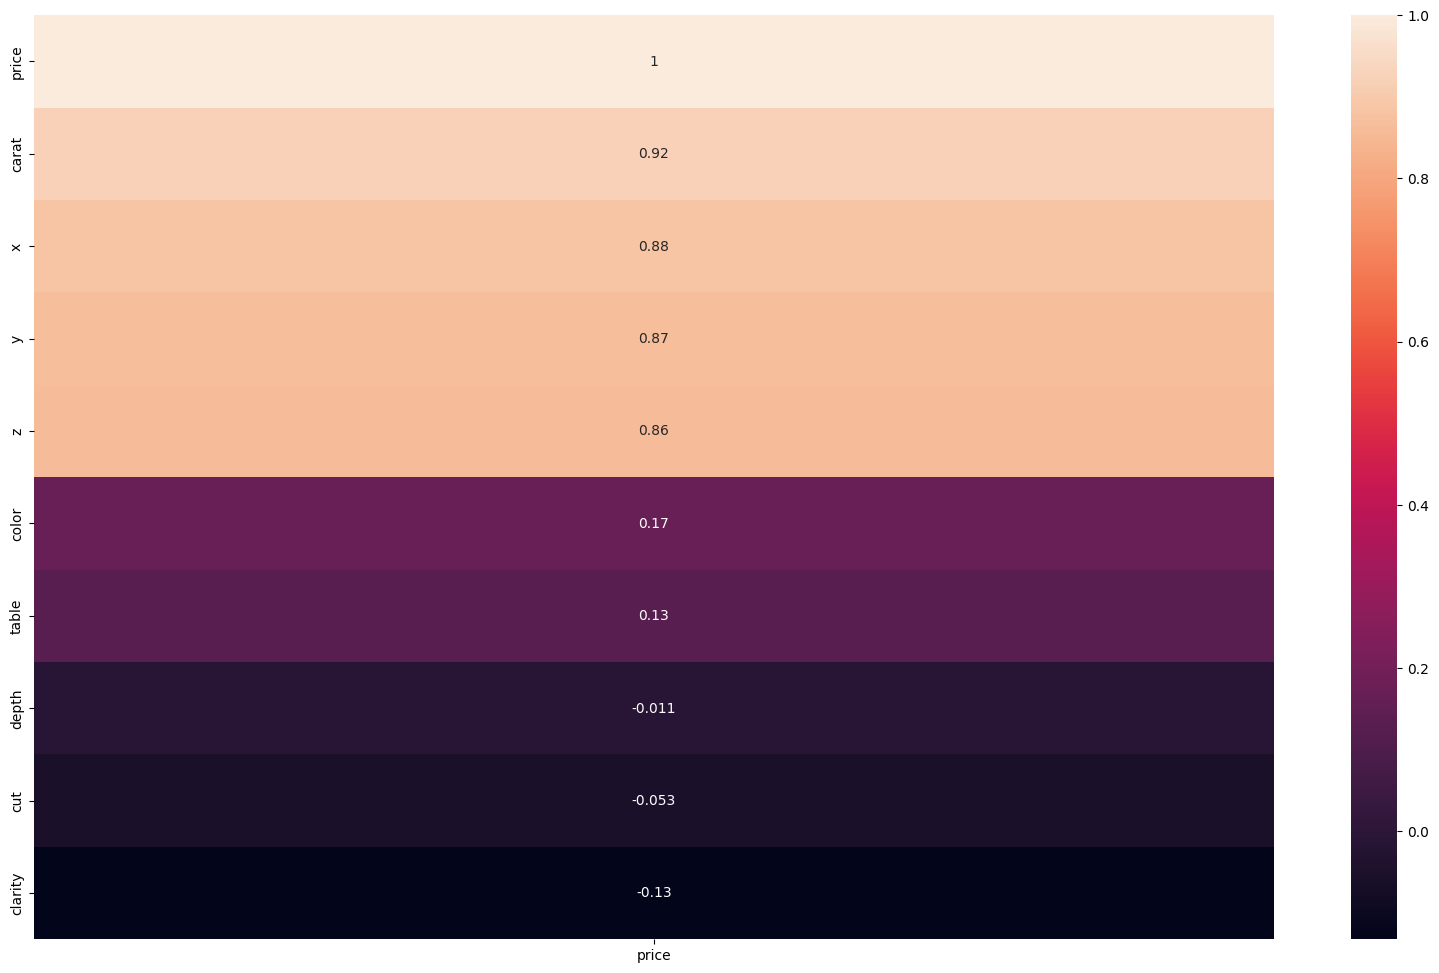

In [150]:
fig, ax = plt.subplots(figsize=(20, 12))

sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), ax=ax, annot=True)

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
x = df[['carat','x','y','z']]
y = df['price']

model.fit(x, y)

predictions = model.predict(x)
r2 = r2_score(y,predictions)
rmse = mean_squared_error(y, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)


The r2 is:  0.8540785520293424
The rmse is:  1523.9385273443215


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [152]:
df['pred_price']=np.round(predictions,0)
df

,carat,cut,color,clarity,depth,table,price,x,y,z,pred_price
0,0.23,4,1,1,61.5,55.0,326,3.95,3.98,2.43,43.0
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,-63.0
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,39.0
3,0.29,3,5,3,62.4,58.0,334,4.20,4.23,2.63,362.0
4,0.31,1,6,1,63.3,58.0,335,4.34,4.35,2.75,394.0
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,2,60.8,57.0,2757,5.75,5.76,3.50,3145.0
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61,3133.0
53937,0.70,2,0,2,62.8,60.0,2757,5.66,5.68,3.56,2972.0
53938,0.86,3,4,1,61.0,58.0,2757,6.15,6.12,3.74,4146.0
